### IMDb Reviews Sentiment Analysis

**Will use the following steps to complete this project.**

* Text preprocessing
* Will create the features using **Bags of Words** and **TF-IDF Models**.
* Finally will train the model


In [ ]:
#Load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import nltk
from bs4 import BeautifulSoup
import re,string

import os
import warnings
warnings.filterwarnings('ignore')
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# let's load the data from local machine
df = pd.read_csv('/content/drive/MyDrive/IMDs-Review/IMDB Dataset.csv')#, nrows=2000)
df.shape


(50000, 2)

In [ ]:
# take a look of data shape
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
# Processing the data
# creating the some function which can clean the data for e.g. remove the htmls links, converting upercase into lower case etc.
def html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# defining the funciton to remove the Emojis
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

#Text-encoding: UTF-8 encoder
def to_unicode(text):
    if isinstance(text, float):
        text = str(text)
    if isinstance(text, int):
        text = str(text)
    if not isinstance(text, str):
        text = text.decode('utf-8', 'ignore')
    return text

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)


#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

#Removing the noisy text
def denoise_text(text):
    text = to_unicode(text)
    text = html(text)
    text = re.sub(r"http\S+", "", text)
    text = deEmojify(text)
    text = text.encode('ascii', 'ignore')
    text = to_unicode(text)
    text = remove_between_square_brackets(text)
    text = remove_special_characters(text)
    text = text.lower()
    return text


In [ ]:
# Let's take a look of a row by selectiong Randomly
df['review'][50]

'Return to the 36th Chamber is one of those classic Kung-Fu movies which Shaw produces back in the 70s and 80s, whose genre is equivalent to the spaghetti westerns of Hollywood, and the protagonist Gordon Liu, the counterpart to the western\'s Clint Eastwood. Digitally remastered and a new print made for the Fantastic Film Fest, this is "Presented in Shaw Scope", just like the good old days.<br /><br />This film is a simple story of good versus evil, told in 3 acts, which more or less sums up the narrative of martial arts films in that era.<br /><br />Act One sets up the premise. Workers in a dye-mill of a small village are unhappy with their lot, having their wages cut by 20% by incoming manchu gangsters. They can\'t do much about their exploitation because none of them are martial arts skilled to take on the gangsters, and their boss. At first they had a minor success in getting Liu to impersonate a highly skilled Shaolin monk (one of the best comedy sequences), but their rouse got e

In [ ]:
#Apply function on review column
df['review']=df['review'].apply(denoise_text)



In [ ]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive


In [ ]:
#here we can check the 50 number documents if it is cleaned
df['review'][50]

'return to the 36th chamber is one of those classic kungfu movies which shaw produces back in the 70s and 80s whose genre is equivalent to the spaghetti westerns of hollywood and the protagonist gordon liu the counterpart to the westerns clint eastwood digitally remastered and a new print made for the fantastic film fest this is presented in shaw scope just like the good old daysthis film is a simple story of good versus evil told in 3 acts which more or less sums up the narrative of martial arts films in that eraact one sets up the premise workers in a dyemill of a small village are unhappy with their lot having their wages cut by 20 by incoming manchu gangsters they cant do much about their exploitation because none of them are martial arts skilled to take on the gangsters and their boss at first they had a minor success in getting liu to impersonate a highly skilled shaolin monk one of the best comedy sequences but their rouse got exposed when they pushed the limit of credibility by

In [ ]:
# Remove the stopwords
import nltk
from nltk.corpus import stopwords
from nltk.tokenize.toktok import ToktokTokenizer

# Import the nltk module and the required components
nltk.download('stopwords')

# Let's use the tokenizer on the text
tokenizer = ToktokTokenizer()

# Setup the English stopwords
stopwords_list = stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:

#You can either remove stopwords before or after stemming. But since this is a review context, we expect users to have used many different words and we did
# stemming before filtering for stopwords.

from nltk.tokenize import word_tokenize,sent_tokenize
stop = set(stopwords.words('english'))

# Removing the stopwords
def removeTheStopWords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopwords_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopwords_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text
#Apply function on review column
df['review']=df['review'].apply(removeTheStopWords)

In [ ]:
df.head()

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically theres family little boy jake thinks...,negative
4,petter matteis love time money visually stunni...,positive


In [ ]:
#Example of randomly selected review text
df['review'][50]

'return 36th chamber one classic kungfu movies shaw produces back 70s 80s whose genre equivalent spaghetti westerns hollywood protagonist gordon liu counterpart westerns clint eastwood digitally remastered new print made fantastic film fest presented shaw scope like good old daysthis film simple story good versus evil told 3 acts less sums narrative martial arts films eraact one sets premise workers dyemill small village unhappy lot wages cut 20 incoming manchu gangsters cant much exploitation none martial arts skilled take gangsters boss first minor success getting liu impersonate highly skilled shaolin monk one best comedy sequences rouse got exposed pushed limit credibility impersonating one many timesact two shows protagonist wanting get back mob however without real martial arts embarks journey shaolin temple try infiltrate learn martial arts sly slapstick moments finally gets accepted abbot impersonated disappointed teaching methods kinda like mr miyagis style karate kid instead 

### Stemming and Lemmatization

Stemming is rule-based, it omits the last few letters like 'ing', 'ed', 'es' and more. It is fast but may create strange words.
Lemmatizing is dictionary-based, where it translates all words to the root form, like 'went' to 'go', 'going' to 'go' and more.
Generally we prefer lemmatizing, but it might take some time in large datasets.

In [ ]:
from nltk.stem import WordNetLemmatizer, SnowballStemmer
nltk.download('wordnet')

def simple_stemmer(review):
  ps = SnowballStemmer(language='english')
  return ' '.join([ps.stem(word) for word in tokenizer.tokenize(review)])


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df['review'][50]

'return 36th chamber one classic kungfu movies shaw produces back 70s 80s whose genre equivalent spaghetti westerns hollywood protagonist gordon liu counterpart westerns clint eastwood digitally remastered new print made fantastic film fest presented shaw scope like good old daysthis film simple story good versus evil told 3 acts less sums narrative martial arts films eraact one sets premise workers dyemill small village unhappy lot wages cut 20 incoming manchu gangsters cant much exploitation none martial arts skilled take gangsters boss first minor success getting liu impersonate highly skilled shaolin monk one best comedy sequences rouse got exposed pushed limit credibility impersonating one many timesact two shows protagonist wanting get back mob however without real martial arts embarks journey shaolin temple try infiltrate learn martial arts sly slapstick moments finally gets accepted abbot impersonated disappointed teaching methods kinda like mr miyagis style karate kid instead 

In [ ]:
df['review'] = df['review'].apply(simple_stemmer)

In [ ]:
df['review'][50]

'return 36th chamber one classic kungfu movi shaw produc back 70s 80s whose genr equival spaghetti western hollywood protagonist gordon liu counterpart western clint eastwood digit remast new print made fantast film fest present shaw scope like good old daysthi film simpl stori good versus evil told 3 act less sum narrat martial art film eraact one set premis worker dyemil small villag unhappi lot wage cut 20 incom manchu gangster cant much exploit none martial art skill take gangster boss first minor success get liu imperson high skill shaolin monk one best comedi sequenc rous got expos push limit credibl imperson one mani timesact two show protagonist want get back mob howev without real martial art embark journey shaolin templ tri infiltr learn martial art sli slapstick moment final get accept abbot imperson disappoint teach method kinda like mr miyagi style karat kid instead paint fenc get erect scaffold around templ noth keep good man unwit build strength endur learn kungfu unorth

In [ ]:
# Keep a copy of dataset
df_clean = df.copy()

In [ ]:
### Create the target Binarisation of Sentiments: Positive: 1, Negative: 0

from sklearn.preprocessing import LabelBinarizer

#LableBinary
lb = LabelBinarizer()


#Transformed sentiment data
df_clean['sentiment'] = lb.fit_transform(df['sentiment'])
df_clean.head()

,review,sentiment
0,one review mention watch 1 oz episod youll hoo...,1
1,wonder littl product film techniqu unassum old...,1
2,thought wonder way spend time hot summer weeke...,1
3,basic there famili littl boy jake think there ...,0
4,petter mattei love time money visual stun film...,1


In [ ]:
from sklearn.model_selection import train_test_split
train, test, y_train, y_test = train_test_split(
    df_clean['review'],
    df_clean['sentiment'],
    test_size=0.2,
    random_state=42
)


In [ ]:
train.shape, test.shape

((40000,), (10000,))

In [ ]:
#Building the Tokenizer
import tensorflow as tf
top_words = 10000
token = tf.keras.preprocessing.text.Tokenizer(num_words=top_words)
# lets fit the tokenizer with trainset

token.fit_on_texts(train.tolist())

In [ ]:
#Vocabulary size with index
token.word_index

{'movi': 1,
 'film': 2,
 'one': 3,
 'like': 4,
 'time': 5,
 'good': 6,
 'make': 7,
 'see': 8,
 'get': 9,
 'charact': 10,
 'watch': 11,
 'even': 12,
 'stori': 13,
 'would': 14,
 'realli': 15,
 'scene': 16,
 'show': 17,
 'look': 18,
 'well': 19,
 'bad': 20,
 'much': 21,
 'great': 22,
 'end': 23,
 'peopl': 24,
 'go': 25,
 'love': 26,
 'also': 27,
 'think': 28,
 'first': 29,
 'act': 30,
 'play': 31,
 'dont': 32,
 'way': 33,
 'thing': 34,
 'made': 35,
 'could': 36,
 'know': 37,
 'seem': 38,
 'say': 39,
 'mani': 40,
 'seen': 41,
 'plot': 42,
 'want': 43,
 'work': 44,
 'take': 45,
 'actor': 46,
 'come': 47,
 'two': 48,
 'never': 49,
 'tri': 50,
 'best': 51,
 'littl': 52,
 'year': 53,
 'life': 54,
 'ever': 55,
 'give': 56,
 'better': 57,
 'man': 58,
 'find': 59,
 'still': 60,
 'perform': 61,
 'part': 62,
 'feel': 63,
 'use': 64,
 'actual': 65,
 'someth': 66,
 'lot': 67,
 'back': 68,
 'interest': 69,
 'real': 70,
 'im': 71,
 'director': 72,
 'guy': 73,
 'doesnt': 74,
 'didnt': 75,
 'cast': 76,


In [ ]:
train

39087    that kept ask mani fight scream match swear ge...
30893    watch entir movi could watch entir movi stop d...
45278    touch love stori reminisc mood love draw heavi...
16398    latterday fulci schlocker total abysm concoct ...
13653    first firm believ norwegian movi continu get b...
                               ...                        
11284    ` shadow magic recaptur joy amaz first movi au...
44732    found movi quit enjoy fair entertain good char...
38158    avoid one terribl movi excit pointless murder ...
860      product quit surpris absolut love obscur earli...
15795    decent movi although littl bit short time pack...
Name: review, Length: 40000, dtype: object

In [ ]:
train[0:1]

39087    that kept ask mani fight scream match swear ge...
Name: review, dtype: object

### Let's finalized the train and text sets by getting index of each words


In [ ]:
X_train = token.texts_to_sequences(train.tolist())
X_test = token.texts_to_sequences(test.tolist())

In [ ]:
def find_longest_sequence_length(X):
    # Use list comprehension to calculate the lengths of all sequences
    sequence_lengths = [len(sequence) for sequence in X]

    # Find the maximum length among all the sequences
    max_length = max(sequence_lengths)

    return max_length
# Call the function
max_length_X_train = find_longest_sequence_length(X_train)
max_length_X_text = find_longest_sequence_length(X_test)

# Print the result
print("Maximum sequence length for X_train:", max_length_X_train)
print("Maximum sequence length for X_text:", max_length_X_text)


Maximum sequence length for X_train: 1271
Maximum sequence length for X_text: 620


In [ ]:
#Define maximum number of words to consider in each review
max_review_length = 300

In [ ]:
#Distribution of target
df_clean['sentiment'].value_counts()

1    25000
0    25000
Name: sentiment, dtype: int64

In [ ]:
#Pre Pad training and test reviews
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, max_review_length, padding='pre')
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, max_review_length, padding='pre')


In [ ]:
X_train[0:1]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,  104,
         728,  372,   40,  288,  843,  757, 2242,  461, 4198, 7343, 9869,
         113, 1499,   27,  425,   28, 3402,   10,   52,  961, 1631, 1015,
         251,  111,   20,  382, 7847,   72, 1175, 1673, 1826,  154,   21,
          57,  389,  176,  137, 2161, 

In [ ]:
X_train.shape, X_test.shape

((40000, 300), (10000, 300))

In [ ]:
#Initialize model
tf.keras.backend.clear_session()

model = tf.keras.Sequential()
# Add the embedding layer (Embedding Layer Input = Batch_Size * Length of each review)
model.add(tf.keras.layers.Embedding(top_words + 1, 33, input_length = max_review_length))
#Add LSTM Layer with 256 as RNN state size
model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.LSTM(64,dropout=0.24)) #RNN State - size of cell state and hidden state
#Use Dense layer for output layer
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 33)           330033    
                                                                 
 batch_normalization (BatchN  (None, 300, 33)          132       
 ormalization)                                                   
                                                                 
 lstm (LSTM)                 (None, 64)                25088     
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 6

In [ ]:
#Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# Training the model
history = model.fit(X_train,y_train,

                    epochs=10,
                    batch_size=64,
                    validation_data=(X_test, y_test))

Epoch 1/10
625/625 [==============================] - 87s 134ms/step - loss: 0.4476 - accuracy: 0.7889 - val_loss: 0.5863 - val_accuracy: 0.7738
Epoch 2/10
625/625 [==============================] - 34s 55ms/step - loss: 0.2450 - accuracy: 0.9020 - val_loss: 0.2819 - val_accuracy: 0.8921
Epoch 3/10
625/625 [==============================] - 21s 34ms/step - loss: 0.1871 - accuracy: 0.9272 - val_loss: 0.2873 - val_accuracy: 0.8928
Epoch 4/10
625/625 [==============================] - 18s 29ms/step - loss: 0.1434 - accuracy: 0.9461 - val_loss: 0.3222 - val_accuracy: 0.8858
Epoch 5/10
625/625 [==============================] - 15s 24ms/step - loss: 0.1102 - accuracy: 0.9577 - val_loss: 0.3746 - val_accuracy: 0.8833
Epoch 6/10
625/625 [==============================] - 16s 26ms/step - loss: 0.0840 - accuracy: 0.9701 - val_loss: 0.3702 - val_accuracy: 0.8843
Epoch 7/10
625/625 [==============================] - 15s 24ms/step - loss: 0.0699 - accuracy: 0.9745 - val_loss: 0.4342 - val_accuracy

In [ ]:
# Step 3: Evaluate the model on the test set
_, train_accuracy = model.evaluate(X_train, y_train)
print("train set accuracy:", train_accuracy)
_, test_accuracy = model.evaluate(X_test, y_test)
print("Test set accuracy:", test_accuracy)


1250/1250 [==============================] - 9s 7ms/step - loss: 0.0112 - accuracy: 0.9961
train set accuracy: 0.9961000084877014
313/313 [==============================] - 2s 7ms/step - loss: 0.5835 - accuracy: 0.8839
Test set accuracy: 0.883899986743927


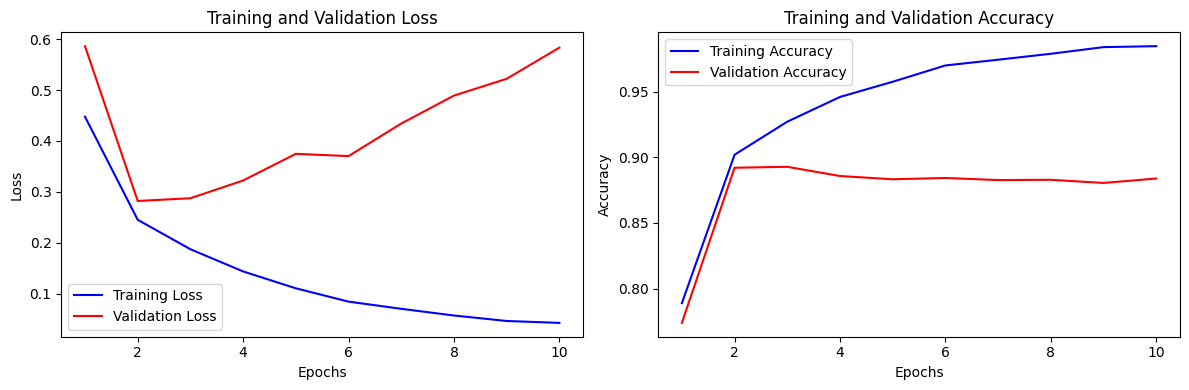

In [ ]:
# Plotting the training and validation metrics
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'b-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Make predictions
predictions = model.predict(X_test)

# Apply a threshold to convert probabilities to class labels (0 or 1)
binary_predictions = (predictions > 0.5).astype(int)

# Print the predictions
print("Binary Predictions:", binary_predictions)


313/313 [==============================] - 3s 8ms/step
Binary Predictions: [[1]
 [1]
 [0]
 ...
 [1]
 [0]
 [1]]


In [ ]:
# # Create the actvsPred DataFrame
# Pred = pd.DataFrame({'Predictions': binary_predictions.flatten()})
# Pred

In [ ]:
import pandas as pd

# Assuming you have a DataFrame named 'text'

# Reset the indices of Pred
Pred = binary_predictions.flatten().tolist()
Pred = pd.Series(Pred, name='prediction')

# Add columns for actual sentiment and predicted sentiment
text['sentiment'] = y_test
text['prediction'] = Pred
text

,review,sentiment,prediction
33553,realli like summerslam due look arena curtain ...,1,NaN
9427,mani televis show appeal quit mani differ kind...,1,1.0
199,film quick get major chase scene ever increas ...,0,1.0
12447,jane austen would definit approv onegwyneth pa...,1,NaN
39489,expect somewhat high went see movi thought ste...,0,NaN
...,...,...,...
28567,although casper van dien michael rooker genera...,0,NaN
25079,like movi wasnt realli sure start watch enjoy ...,1,NaN
18707,yes nonsingaporean cant see what big deal film...,1,NaN
15200,far film go likabl enough entertain charact go...,0,NaN


In [ ]:
import pandas as pd
import numpy as np

# Flatten the arrays
y_test_flat = np.ravel(y_test)
binary_predictions_flat = np.ravel(binary_predictions)

# Create the actvsPred DataFrame
actvsPred = pd.DataFrame({'Actual': y_test_flat, 'Predictions': binary_predictions_flat})

# Print the actvsPred DataFrame
actvsPred['diff'] = actvsPred['Actual'] - actvsPred['Predictions']

In [ ]:
actvsPred.head(50)

,Actual,Predictions,diff
0,1,1,0
1,1,1,0
2,0,0,0
3,1,1,0
4,0,0,0
5,1,1,0
6,1,1,0
7,1,1,0
8,0,0,0
9,0,0,0
